## Section 8: Palisades/ Eaton EJ map

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#census = gpd.read_file("SVI2022_CALIFORNIA_tract.gdb")
census = gpd.read_file("EJI_2024_United_States/EJI_2024_United_States.gdb/")

##### Eaton wrangling

In [3]:
eaton_perimeter = gpd.read_file('Eaton_Perimeter_20250121/Eaton_Perimeter_20250121.shp')

In [4]:
census = census.to_crs(3857)
census.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
census.crs == eaton_perimeter.crs

True

In [6]:
filtered_census_eaton = gpd.sjoin(census, eaton_perimeter, predicate='intersects')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


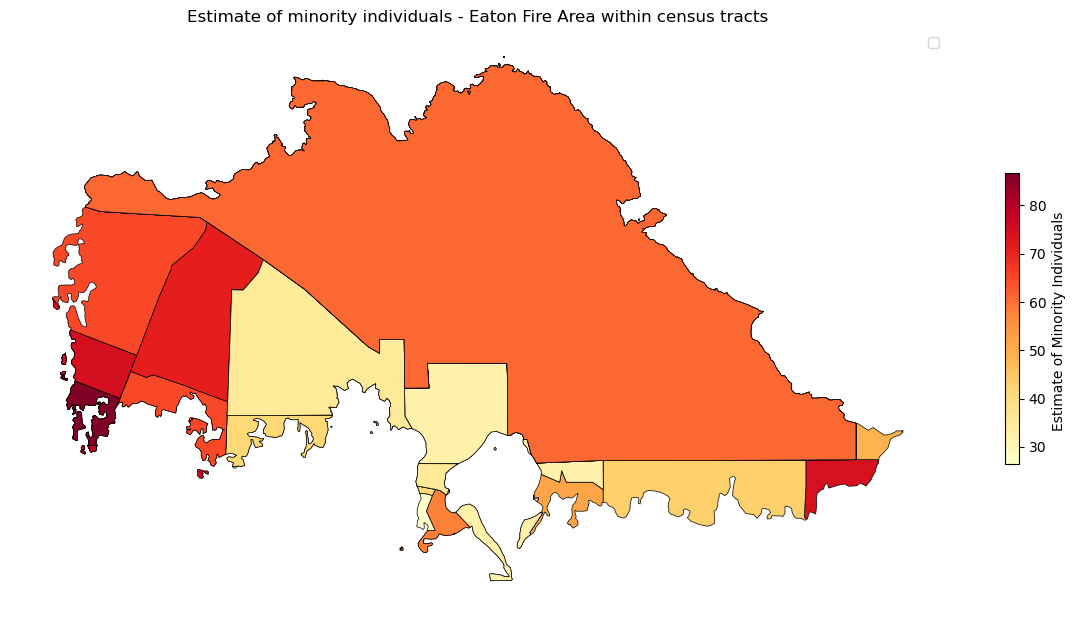

In [16]:
census_within_eaton = gpd.clip(filtered_census_eaton, eaton_perimeter)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

census_within_eaton.plot(column='E_MINRTY', 
                     cmap='YlOrRd',  
                     legend=True,
                     ax=ax,
                     edgecolor='black',
                     linewidth=0.5,
                     legend_kwds={'label': "Estimate of Minority Individuals ",
                                  'orientation': "vertical", 
                                  'shrink': 0.3})

# Add title and labels
plt.title('Estimate of minority individuals - Eaton Fire Area within census tracts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

ax.set_axis_off()

plt.tight_layout()
plt.show()



####

#### Palisades Wrangling

In [9]:
palisade_perimeter = gpd.read_file('Palisades_Perimeter_20250121/Palisades_Perimeter_20250121.shp')
palisade_perimeter.crs == census.crs

True

In [10]:
filtered_census_palisade = gpd.sjoin(census, palisade_perimeter, predicate='intersects')
census_within_palisades = gpd.clip(filtered_census_palisade, palisade_perimeter)

census_within_palisades.head()

,OBJECTID_left,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry,index_right,OBJECTID_right,type,Shape__Are,Shape__Len
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195104.001 4033959.777, -13...",5,6,Heat Perimeter,37.343750,25.061294
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195104.001 4033959.777, -13...",3,4,Heat Perimeter,214.992188,76.639180
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195104.001 4033959.777, -13...",4,5,Heat Perimeter,44203.453125,1569.259764
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195104.001 4033959.777, -13...",13,14,Heat Perimeter,2114.519531,192.800226
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195104.001 4033959.777, -13...",12,13,Heat Perimeter,9.960938,14.600921


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


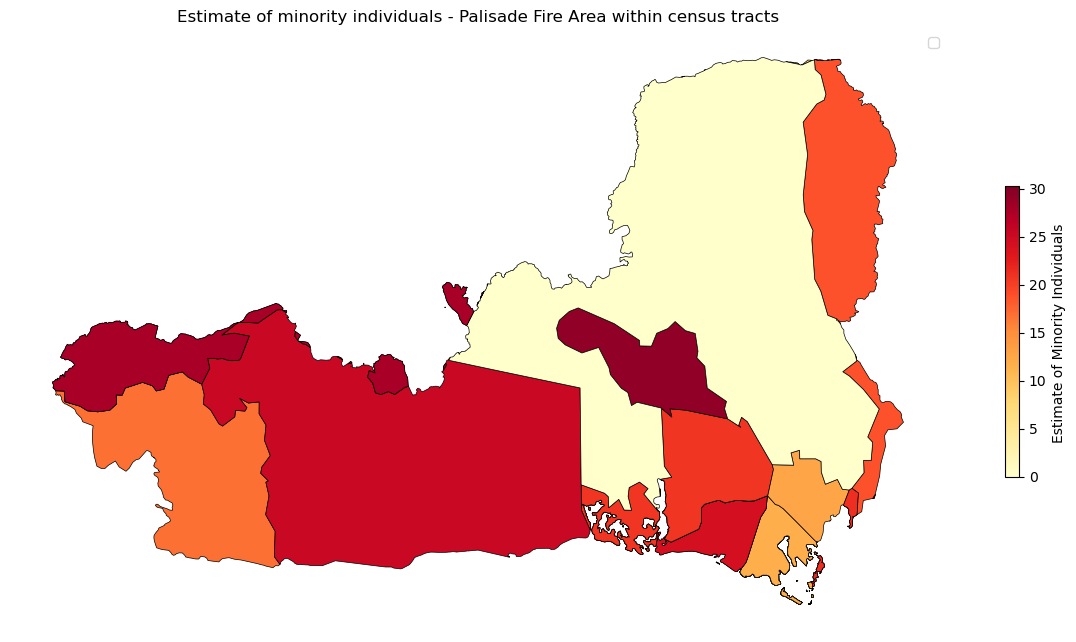

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

census_within_palisades.plot(column='E_MINRTY', 
                     cmap='YlOrRd',  
                     legend=True,
                     ax=ax,
                     edgecolor='black',
                     linewidth=0.5,
                     legend_kwds={'label': "Estimate of Minority Individuals ",
                                  'orientation': "vertical", 
                                  'shrink': 0.3})



# Add title and labels
plt.title('Estimate of minority individuals - Palisade Fire Area within census tracts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

ax.axis('off')
plt.tight_layout()
plt.show()

### Create plot of both fires with basemap

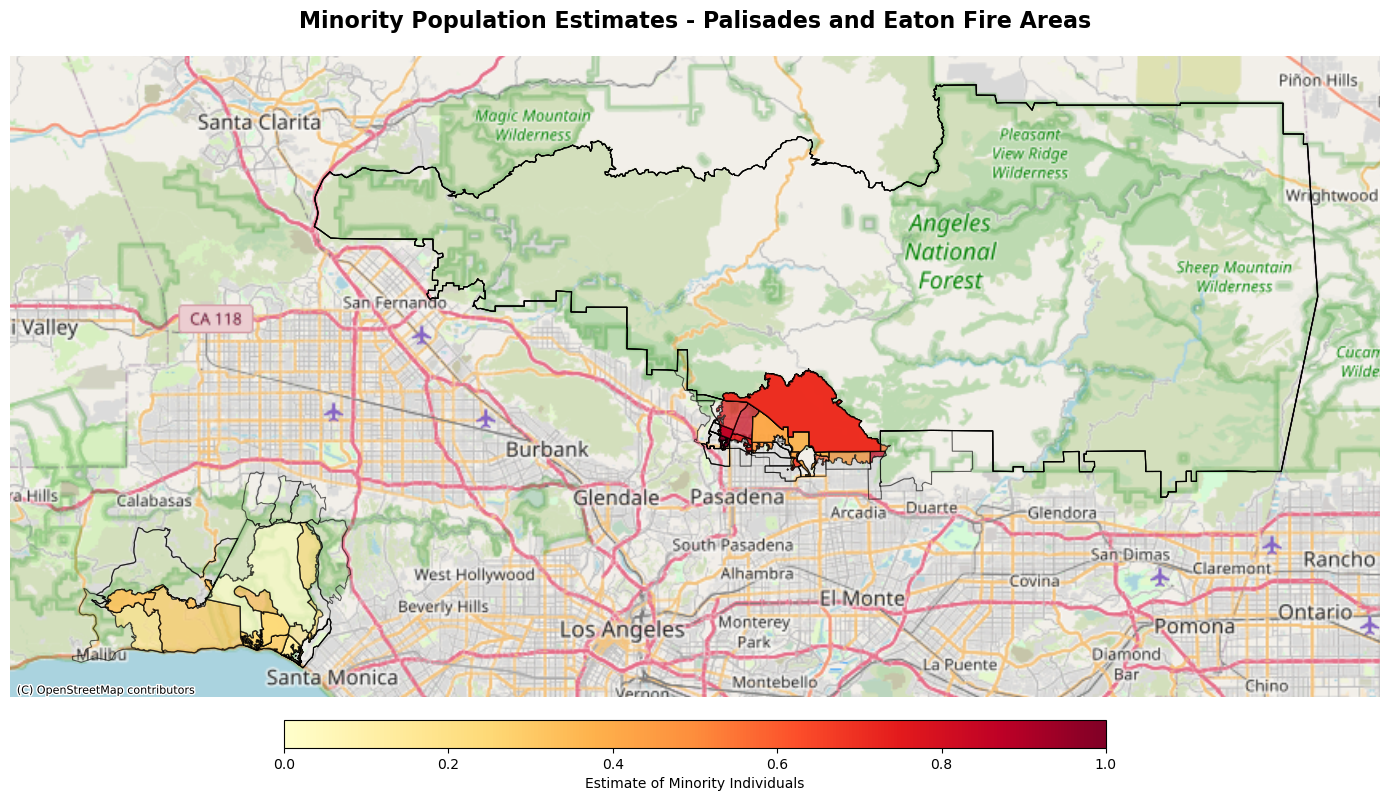

In [19]:
import contextily as ctx

fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Find common min/max for legend range
vmin = min(census_within_palisades['E_MINRTY'].min(), census_within_eaton['E_MINRTY'].min())
vmax = max(census_within_palisades['E_MINRTY'].max(), census_within_eaton['E_MINRTY'].max())



# Plot census tracts that intersect with fire perimter
filtered_census_palisade.plot(
                              color = 'none',
                              vmin=vmin, vmax=vmax,
                              legend=False,
                              ax=ax,
                              edgecolor='black',
                              linewidth=0.8,
                              alpha=0.6)

filtered_census_eaton.plot( 
                          color = 'none',
                          vmin=vmin, vmax=vmax,
                          legend=False,
                          ax=ax,
                          edgecolor='black',
                          linewidth=0.8,
                          alpha=0.6)


# Plot census tracts within perimter, colored by minority percentage
census_within_palisades.plot(column='E_MINRTY', 
                              cmap = 'YlOrRd',
                              vmin=vmin, vmax=vmax,
                              legend=False,
                              ax=ax,
                              edgecolor='black',
                              linewidth=0.9,
                              alpha=0.7)

census_within_eaton.plot(column='E_MINRTY', 
                          cmap = 'YlOrRd',
                          vmin=vmin, vmax=vmax,
                          legend=False,
                          ax=ax,
                          edgecolor='black',
                          linewidth=0.9,
                          alpha=0.7)


# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Add fire perimeter 
#palisade_perimeter.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3 )
#eaton_perimeter.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3)

ax.set_title('Minority Population Estimates - Palisades and Eaton Fire Areas', fontsize=16, fontweight='bold', pad=20)
ax.axis('off')


# Add colorbar
sm = plt.cm.ScalarMappable(cmap='YlOrRd')
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.6, aspect = 30, pad = .02)
cbar.set_label('Estimate of Minority Individuals')

plt.tight_layout()
plt.show()